In [1]:
import matplotlib.pyplot as plt
import numpy as np
import thermal_property_calculator as tpc
import matplotlib.colors as pltc

ModuleNotFoundError: No module named 'ipympl'

# Global Constants

In [4]:
k_b = 1.380649*10**(-23) # J / K
h_bar = 1.054571*10**(-34) # J s
N_A = 6.022*10**(23)

In [5]:
data_fe = np.genfromtxt(r"data\specific_heat_feps3.txt", delimiter=' ')
T_fe = data_fe[:, 0]
C_fe = data_fe[:, 1]
T_db_fe, T_ei_fe, x_fe, n_fe = 236, 523, 0.54, 5

In [6]:
TN_feps = 118 # K
J = TN_feps*k_b*np.log(2+np.sqrt(3))/2 # J
mu_0 = 4*np.pi*10**(-7) # T m / A
H_E_feps = 69/mu_0 # A / m
H_A_feps = 138/mu_0 # A / m
a_feps = 2*(5.94 + 10)/2 * 10**(-10) # we take the lattice parameter as average of the two (assuming square lattice instead of rectangular)
J_feps = 2
g_feps = 4.54
n_feps = 2.22*10**27
v_feps = 3823
thickness = 45*10**(-9)

# Specific Heat

In [7]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))

In [8]:
c_db = tpc.c_debye(T, T_db_fe) * n_fe * N_A
c_ei = tpc.c_einstein(T, T_ei_fe) * n_fe * N_A
c_cb = tpc.c_comb(T, T_db_fe, T_ei_fe, x_fe, n_fe)

In [9]:
if False:
    c_is = tpc.c_ising(T, TN_feps, 1)
    np.savetxt('data/c_ising_T118.csv', c_is, delimiter=',')
c_is = np.loadtxt('data/c_ising_T118.csv', delimiter=',')

In [10]:
c_mag = tpc.c_magnon(T, TN_feps, H_E_feps, H_A_feps, J_feps)

c_magnon -> Temperature step: 49.0

c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\thermal_property_calculator.py:264: RuntimeWarning: divide by zero encountered in reciprocal
  return (2*J + 1)/(2*J)*(np.tanh((2*J + 1)*x/(2*J)))**(-1) - 1/(2*J)*(np.tanh(x/(2*J)))**(-1)
c:\Users\abermejillosec\OneDrive - Delft University of Technology\_TUDelft\5. PhD\A1. Projects\1. TED\ted_anisotropy\thermal_property_calculator.py:264: RuntimeWarning: invalid value encountered in subtract
  return (2*J + 1)/(2*J)*(np.tanh((2*J + 1)*x/(2*J)))**(-1) - 1/(2*J)*(np.tanh(x/(2*J)))**(-1)
C:\Users\abermejillosec\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


c_magnon -> Temperature step: 200.07599999999999


In [11]:
c_M = c_is + c_mag
c_V = c_cb + c_M
np.savetxt('data/c_V_calculated.csv', c_V, delimiter=',')

In [12]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(3,1, figsize=(5, 8),sharex=True)
ax[0].plot(T, c_cb, label='$c_{el}$')
ax[0].plot(T, c_db, alpha=0.7, label='$c_D$',linestyle='dashed')
ax[0].plot(T, c_ei, alpha=0.7, label='$c_E$',linestyle='dashed')

ax[0].set_ylabel('$c_{el}$ [Jmol$^{-1}$K$^{-1}$]')
#ax[0].tick_params(direction='in', right=True, left=True, bottom=True)
ax[0].legend(fontsize=13)


ax[1].plot(T, c_M)
ax[1].set_ylabel('$c_{M}$ [Jmol$^{-1}$K$^{-1}$]')
#ax[1].tick_params(direction='in', right=True, left=True, bottom=True)

ax[2].plot(T, c_V)
ax[2].scatter(T_fe, C_fe,marker='o', s=25, facecolor='none',edgecolor='k',label='Exp.')
ax[2].set_ylabel('$c_{V}$ [Jmol$^{-1}$K$^{-1}$]')
ax[2].set_xlabel('T [K]')
ax[2].legend(loc='upper left',fontsize=13)

plt.subplots_adjust(hspace=0)
plt.savefig(r'figures/specific_heat.svg')
plt.show()

In [13]:
fig, ax = plt.subplots(1,1, figsize=(4, 3),sharex=True)
ax.plot(T, c_V)
ax.plot(T, c_cb, label='$c_{el}$')
ax.plot(T, c_M)
ax.scatter(T_fe, C_fe,marker='o', s=25, facecolor='none',edgecolor='k',label='Exp.')

ax.set_ylabel('$c_{V}$ (Jmol$^{-1}$K$^{-1}$)')

plt.subplots_adjust(hspace=0)
plt.savefig(r'figures/total_specific_heat.svg')
plt.show()

# Thermal conductivity
We compute the thermal conductivity for different constant phonon and magnon lifetimes according to a 2D isotropic model

In [20]:
tau_ph_vec = np.linspace(10**-12,2*10**-10,10)
tau_mag_vec = np.array([10**(-9), 5*10**(-9), 5*10**(-8), 10**-7])
k_ph_vec = []
for tau in tau_ph_vec:
    k_ph_vec.append(tpc.k_elastic(T, T_db_fe, T_ei_fe, x_fe, n_fe, v_feps, tau, thickness))
k_mag_vec = []
for tau in tau_mag_vec:
    k_mag_vec.append(tpc.k_magnon(T, TN_feps, H_E_feps, H_A_feps, J_feps, tau)/thickness)

K_mag -> Temperature step: 200.07599999999999
K_mag -> Temperature step: 200.07599999999999
K_mag -> Temperature step: 200.07599999999999
K_mag -> Temperature step: 200.07599999999999


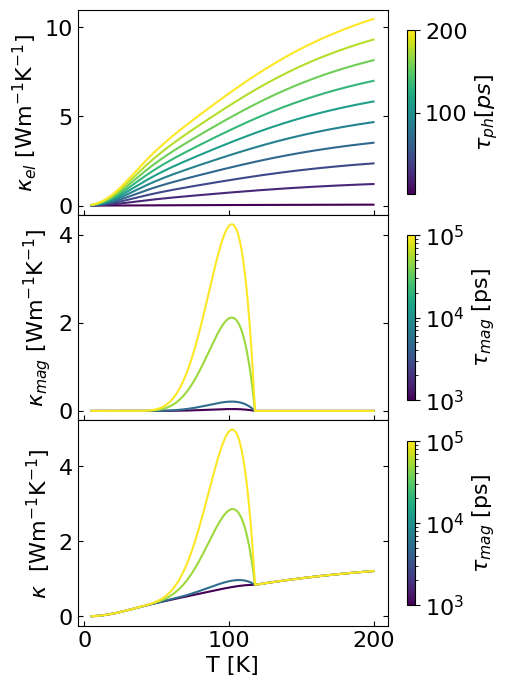

In [22]:
tau_ph_vec_plot = tau_ph_vec*10**12
tau_mag_vec_plot = tau_mag_vec*10**12
data_kappa_fe = np.genfromtxt(r"data/kappa_feps3.csv", delimiter=' ')
T_kappa_fe = data_kappa_fe[:, 0]
kappa_fe = data_kappa_fe[:, 1]
kappa_fe_exp = np.interp(T, T_kappa_fe, kappa_fe)


cmap = plt.get_cmap('viridis')
norm_ph = plt.Normalize(vmin=tau_ph_vec_plot[0], vmax=tau_ph_vec_plot[-1])
sm_ph = plt.cm.ScalarMappable(cmap=cmap, norm=norm_ph)
sm_ph.set_array([])
norm = pltc.LogNorm(vmin=tau_mag_vec_plot[0], vmax=tau_mag_vec_plot[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(3,1, figsize=(5,8),sharex=True)
for i, k in enumerate(k_ph_vec):
    ax[0].plot(T, k, color=cmap(norm_ph(tau_ph_vec_plot[i])))
ax[0].tick_params(direction='in', right=True, left=True, bottom=True)
ax[0].set_ylabel('$\kappa_{el}$ [Wm$^{-1}$K$^{-1}$]')

for i, k in enumerate(tau_mag_vec):
    ax[1].plot(T, k_mag_vec[i], color=cmap(norm(tau_mag_vec_plot[i])))
    ax[2].plot(T, k_mag_vec[i]+k_ph_vec[1],color=cmap(norm(tau_mag_vec_plot[i])))
#ax[2].scatter(T_kappa_fe, kappa_fe)


ax[1].tick_params(direction='in', right=True, left=True, bottom=True)
ax[1].set_ylabel('$\kappa_{mag}$ [Wm$^{-1}$K$^{-1}$]')

ax[2].tick_params(direction='in', right=True, left=True, bottom=True)
ax[2].set_ylabel('$\kappa$  [Wm$^{-1}$K$^{-1}$]')
ax[2].set_xlabel('T [K]')

cbar_ph = fig.colorbar(sm_ph, ax=ax[0], label=r'$\tau_{ph} [ps]$', shrink=0.8)
cbar = fig.colorbar(sm, ax=ax[1], label=r'$\tau_{mag}$ [ps]', shrink=0.8)
cbar2 = fig.colorbar(sm, ax=ax[2], label=r'$\tau_{mag}$ [ps]', shrink=0.8)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(r'figures/thermal_conductivity.svg')
plt.show()

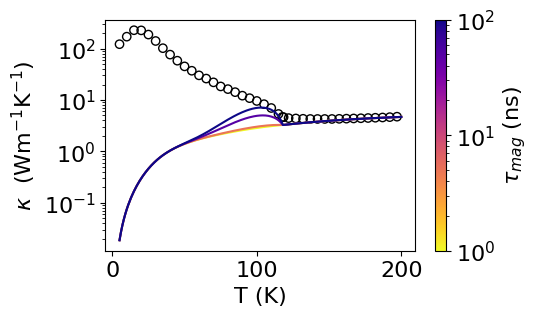

In [23]:
tau_ph_vec_plot = tau_ph_vec*10**12
tau_mag_vec_plot = tau_mag_vec*10**9
data_kappa_fe = np.genfromtxt(r"data/kappa_feps3.csv", delimiter=' ')
T_kappa_fe = data_kappa_fe[:, 0]
kappa_fe = data_kappa_fe[:, 1]
data_kappa_log = np.genfromtxt(r"data/kappa_feps3_log.csv", delimiter=' ')
T_kappa_log = data_kappa_log[:, 0]
kappa_log = data_kappa_log[:, 1]
kappa_fe_exp = np.interp(T[::5], T_kappa_log, kappa_log)


cmap = plt.get_cmap('plasma_r')
norm = pltc.LogNorm(vmin=tau_mag_vec_plot[0], vmax=tau_mag_vec_plot[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1, figsize=(5,3),sharex=True)
for i, k in enumerate(tau_mag_vec):
    ax.plot(T, k_mag_vec[i]+k_ph_vec[4],color=cmap(norm(tau_mag_vec_plot[i])))
#ax.scatter(T_kappa_log, kappa_log, facecolor='none', edgecolor='k')
ax.scatter(T[::5], kappa_fe_exp, facecolor='none', edgecolor='k')

ax.set_ylabel('$\kappa$  (Wm$^{-1}$K$^{-1}$)')
ax.set_xlabel('T (K)')
ax.set_yscale('log')

cbar2 = fig.colorbar(sm, ax=ax, label=r'$\tau_{mag}$ (ns)')
plt.savefig(r'figures/kappa_feps3.pdf', bbox_inches='tight')
plt.show()

# Thermal expansion coefficient
The key to computing the expansion coefficient is just applying Gruneisens relation and finding the right ratio between the elastic and magnetic gruneisen parameter, which we consider constant.

In [33]:
data_alfa_fe = np.genfromtxt(r"data/alpha_feps3.csv", delimiter=' ')
data_kappa_fe = np.genfromtxt(r"data/kappa_feps3.csv", delimiter=' ')
T_alfa_fe = data_alfa_fe[:, 0]
alfa_fe = data_alfa_fe[:, 1]
alfa_FE = np.interp(T,T_alfa_fe,alfa_fe)*3*10**(-5)

beta_T = 1.14*10**(-11) # Pa
gamma_E = 1.798
rho = 18443 # mol/m^3
alpha = beta_T*rho*(gamma_E*c_cb + 4*gamma_E*(c_mag + c_is))

np.savetxt('data/alpha_calculated.csv', alpha, delimiter=',')

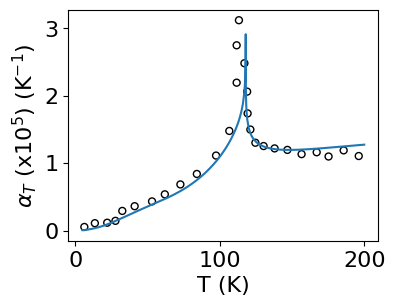

In [25]:
fig, ax = plt.subplots(1,1,figsize=(4,3), sharex=True)#, dpi=500)
ax.plot(T, alpha*10**5/3)
ax.scatter(T_alfa_fe, alfa_fe, marker='o', s=25, facecolor='none',edgecolor='k', label='Exp.')
ax.set_ylabel(r'$\alpha_T$ (x$10^5$) (K$^{-1}$)')
ax.set_xlabel('T (K)')
plt.savefig(r'figures/alpha.pdf', bbox_inches='tight')
plt.show()